### How to Get File

On g:Profiler website (https://biit.cs.ut.ee/gprofiler/gost), select 'Detailed Results' and then download as CSV

### Inputs

In [2]:
folder='~/Desktop/'
file_name='gProfiler_hsapiens_10-28-2022_6-22-48 PM__intersections.csv'
title_of_graph='GO Terms g:Profiler'
total_path=folder+file_name

In [3]:
num_of_terms=10 #max = 20 ... from CCST paper = 10

### Pulling Terms and Making Figure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(total_path)

In [5]:
terms=np.array(df['term_name'][0:num_of_terms])
p_val=np.array(df['negative_log10_of_adjusted_p_value'][0:num_of_terms])

In [6]:
terms_tup=tuple(terms.reshape(1, -1)[0])

In [7]:
x_axis=np.linspace(0,round(np.max(p_val)/10)*10,3)
x_axis_label=list()
for i in range(len(x_axis)):
    x_axis_label.append(int(x_axis[i]))

In [8]:
if num_of_terms<=10:
    colors=list(sns.color_palette('tab10').as_hex())
else:
    colors=list(sns.color_palette('tab20').as_hex())

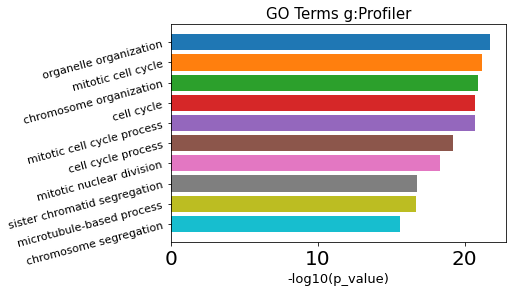

In [9]:
fig, ax = plt.subplots()

y_pos = np.arange(len(terms))


ax.barh(y_pos, p_val, align='center',color=colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(terms_tup,rotation=15,size=11)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xticks(x_axis)
ax.set_xticklabels(labels=x_axis_label,size=20)
ax.set_xlabel('-log10(p_value)',size=13)
ax.set_title(title_of_graph,size=15)

#plt.savefig(title_of_graph+'.png',dpi=200,bbox_inches='tight')
plt.show()